Task 1: 

In [1]:
#Cleanning Total School Age

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
#laoding the dataset

In [5]:
school_source=pd.read_csv('Total School Age.csv',sep=',',header=None)

In [6]:
school_filename='Total School Age.csv'


In [7]:
school_loaded=pd.read_csv(school_filename,sep=',',header=None)

In [8]:
#checking is source file is equal to loaded file

In [9]:
if school_source.equals(school_loaded):
    print("The loaded data is equivalent to the data in the source CSV file.")
else:
    print("The loaded data is not equivalent to the data in the source CSV file.")

The loaded data is equivalent to the data in the source CSV file.


In [10]:
### making the right heading

In [11]:
school_loaded=pd.read_csv(school_filename,sep=',',header=[1])

In [12]:
school_loaded

ISO3 Countries and areas Region Sub-region               Income Group  \
0   DZA             Algeria   MENA       MENA   Upper middle income (UM)   
1   AGO              Angola    SSA        ESA   Lower middle income (LM)   
2   ARG           Argentina    LAC        LAC   Upper middle income (UM)   
3   ARM             Armenia    ECA       EECA   Upper middle income (UM)   
4   BGD          Bangladesh     SA         SA   Lower middle income (LM)   
..  ...                 ...    ...        ...                        ...   
82  URY             Uruguay    LAC        LAC            High income (H)   
83  UZB          Uzbekistan    ECA       EECA  Lowerr middle income (LM)   
84  VNM            Viet Nam    EAP        EAP   Lower middle income (LM)   
85  ZMB              Zambia    SSA        ESA   Lower middle income (LM)   
86  ZWE            Zimbabwe    SSA        ESA   Lower middle income (LM)   

   Total Rural (Residence) Urban (Residence) Poorest (Wealth quintile)  \
0    24%                9%               32%                        1%   
1    17%                2%               24%                        0%   
2    40%               NaN               NaN                       NaN   
3    81%               71%               88%                       47%   
4    37%               33%               52%                        9%   
..   ...               ...               ...                       ...   
82   63%               47%               65%                       35%   
83   19%               16%               29%                        1%   
84   62%               NaN               62%                       NaN   
85    6%                2%               13%                        0%   
86   26%               18%               49%                        4%   

   Richest (Wealth quintile)  \
0                        77%   
1                        62%   
2                        NaN   
3                        99%   
4                        76%   
..                       ...   
82                       NaN   
83                       69%   
84                       NaN   
85                       28%   
86                       62%   

                                          Data source Time period  
0                   Multiple Indicator Cluster Survey     2018-19  
1                       Demographic and Health Survey     2015-16  
2                   Multiple Indicator Cluster Survey     2011-12  
3                       Demographic and Health Survey     2015-16  
4                   Multiple Indicator Cluster Survey        2019  
..                                                ...         ...  
82                  Multiple Indicator Cluster Survey     2012-99  
83                       UNICEF Nutrition Survey 2017        2017  
84  STEP Skills Measurement Household Survey 2012 ...        2012  
85                      Demographic and Health Survey     2018-19  
86                  Multiple Indicator Cluster Survey     2018-19  

[87 rows x 12 columns]

In [13]:
#### finding out the columns which has null values and the count of nulls

In [14]:

null_cols = school_loaded.columns[school_loaded.isnull().sum() > 0]
null_counts = school_loaded[null_cols].isnull().sum()

In [15]:
null_counts

Rural (Residence)            10
Urban (Residence)             7
Poorest (Wealth quintile)    17
Richest (Wealth quintile)    18
dtype: int64

In [16]:
#converting the percentage values to float type

In [17]:
school_loaded['Rural (Residence)'] = school_loaded['Rural (Residence)'].replace('%', '', regex=True).astype(float)

In [18]:
school_loaded['Urban (Residence)'] = school_loaded['Urban (Residence)'].replace('%', '', regex=True).astype(float)

In [19]:
school_loaded['Poorest (Wealth quintile)'] = school_loaded['Poorest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [20]:
school_loaded['Richest (Wealth quintile)'] = school_loaded['Richest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [21]:
school_loaded['Total'] = school_loaded['Total'].replace('%', '', regex=True).astype(float)

In [22]:
#checking is any value is more than 100 in the pecentage type columns

In [23]:
rural=school_loaded['Rural (Residence)']
for i in rural:
    if i > 100:
        print("value more than 100 in rural")
urban=school_loaded['Urban (Residence)']
for i in urban:
    if i > 100:
        print("value more than 100 in urban")
poor=school_loaded['Poorest (Wealth quintile)']
for i in poor:
    if i > 100:
        print("value more than 100 in poorest")
rich=school_loaded['Richest (Wealth quintile)']
for i in rich:
    if i > 100:
        print("value more than 100 in richest")

In [24]:
#replacing null value with mean value of that column

In [25]:
for col in null_cols:
    if school_loaded[col].dtype == 'float64':
         school_loaded[col].fillna(school_loaded[col].mean(), inplace=True)

In [26]:
school_loaded['Rural (Residence)']

0      9.000000
1      2.000000
2     27.077922
3     71.000000
4     33.000000
        ...    
82    47.000000
83    16.000000
84    27.077922
85     2.000000
86    18.000000
Name: Rural (Residence), Length: 87, dtype: float64

In [27]:
school_loaded['Urban (Residence)']

0     32.0000
1     24.0000
2     43.9375
3     88.0000
4     52.0000
       ...   
82    65.0000
83    29.0000
84    62.0000
85    13.0000
86    49.0000
Name: Urban (Residence), Length: 87, dtype: float64

In [28]:
school_loaded['Poorest (Wealth quintile)']

0      1.000000
1      0.000000
2     18.457143
3     47.000000
4      9.000000
        ...    
82    35.000000
83     1.000000
84    18.457143
85     0.000000
86     4.000000
Name: Poorest (Wealth quintile), Length: 87, dtype: float64

In [29]:
school_loaded['Richest (Wealth quintile)']

0     77.000000
1     62.000000
2     62.565217
3     99.000000
4     76.000000
        ...    
82    62.565217
83    69.000000
84    62.565217
85    28.000000
86    62.000000
Name: Richest (Wealth quintile), Length: 87, dtype: float64

In [30]:
null_cols = school_loaded.columns[school_loaded.isnull().sum() > 0]
null_counts = school_loaded[null_cols].isnull().sum()

In [31]:
#now no null values
null_counts

Series([], dtype: float64)

In [32]:
school_loaded

ISO3 Countries and areas Region Sub-region               Income Group  \
0   DZA             Algeria   MENA       MENA   Upper middle income (UM)   
1   AGO              Angola    SSA        ESA   Lower middle income (LM)   
2   ARG           Argentina    LAC        LAC   Upper middle income (UM)   
3   ARM             Armenia    ECA       EECA   Upper middle income (UM)   
4   BGD          Bangladesh     SA         SA   Lower middle income (LM)   
..  ...                 ...    ...        ...                        ...   
82  URY             Uruguay    LAC        LAC            High income (H)   
83  UZB          Uzbekistan    ECA       EECA  Lowerr middle income (LM)   
84  VNM            Viet Nam    EAP        EAP   Lower middle income (LM)   
85  ZMB              Zambia    SSA        ESA   Lower middle income (LM)   
86  ZWE            Zimbabwe    SSA        ESA   Lower middle income (LM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
0    24.0           9.000000            32.0000                   1.000000   
1    17.0           2.000000            24.0000                   0.000000   
2    40.0          27.077922            43.9375                  18.457143   
3    81.0          71.000000            88.0000                  47.000000   
4    37.0          33.000000            52.0000                   9.000000   
..    ...                ...                ...                        ...   
82   63.0          47.000000            65.0000                  35.000000   
83   19.0          16.000000            29.0000                   1.000000   
84   62.0          27.077922            62.0000                  18.457143   
85    6.0           2.000000            13.0000                   0.000000   
86   26.0          18.000000            49.0000                   4.000000   

    Richest (Wealth quintile)  \
0                   77.000000   
1                   62.000000   
2                   62.565217   
3                   99.000000   
4                   76.000000   
..                        ...   
82                  62.565217   
83                  69.000000   
84                  62.565217   
85                  28.000000   
86                  62.000000   

                                          Data source Time period  
0                   Multiple Indicator Cluster Survey     2018-19  
1                       Demographic and Health Survey     2015-16  
2                   Multiple Indicator Cluster Survey     2011-12  
3                       Demographic and Health Survey     2015-16  
4                   Multiple Indicator Cluster Survey        2019  
..                                                ...         ...  
82                  Multiple Indicator Cluster Survey     2012-99  
83                       UNICEF Nutrition Survey 2017        2017  
84  STEP Skills Measurement Household Survey 2012 ...        2012  
85                      Demographic and Health Survey     2018-19  
86                  Multiple Indicator Cluster Survey     2018-19  

[87 rows x 12 columns]

In [33]:
#remove white spaces in ISO column and check is any string is more than 3 letters

In [34]:
school_loaded['ISO3'] = school_loaded['ISO3'].str.replace(r'\s', '')

<ipython-input-34-da47dd3dfab7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  school_loaded['ISO3'] = school_loaded['ISO3'].str.replace(r'\s', '')


In [35]:
iso=school_loaded['ISO3']

In [36]:
for i in range(len(iso)):
    string=iso[i]
    if len(string) > 3:
        print(f"string'{iso[i]}'lenght more than 3  ")

In [37]:
#cleaning the time period column

In [38]:
column = school_loaded['Time period']

In [39]:
for i in range(len(column)):                                   
    if '-' in column[i]:
        start_year, end_year = column[i].split('-')
        start_year = str(int(start_year) + 1)
        column[i]=start_year

<ipython-input-39-5a490ea23303>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i]=start_year


In [40]:
column

0     2019
1     2016
2     2012
3     2016
4     2019
      ... 
82    2013
83    2017
84    2012
85    2019
86    2019
Name: Time period, Length: 87, dtype: object

In [41]:
school_loaded['Time period']=column

In [42]:
school_loaded

ISO3 Countries and areas Region Sub-region               Income Group  \
0   DZA             Algeria   MENA       MENA   Upper middle income (UM)   
1   AGO              Angola    SSA        ESA   Lower middle income (LM)   
2   ARG           Argentina    LAC        LAC   Upper middle income (UM)   
3   ARM             Armenia    ECA       EECA   Upper middle income (UM)   
4   BGD          Bangladesh     SA         SA   Lower middle income (LM)   
..  ...                 ...    ...        ...                        ...   
82  URY             Uruguay    LAC        LAC            High income (H)   
83  UZB          Uzbekistan    ECA       EECA  Lowerr middle income (LM)   
84  VNM            Viet Nam    EAP        EAP   Lower middle income (LM)   
85  ZMB              Zambia    SSA        ESA   Lower middle income (LM)   
86  ZWE            Zimbabwe    SSA        ESA   Lower middle income (LM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
0    24.0           9.000000            32.0000                   1.000000   
1    17.0           2.000000            24.0000                   0.000000   
2    40.0          27.077922            43.9375                  18.457143   
3    81.0          71.000000            88.0000                  47.000000   
4    37.0          33.000000            52.0000                   9.000000   
..    ...                ...                ...                        ...   
82   63.0          47.000000            65.0000                  35.000000   
83   19.0          16.000000            29.0000                   1.000000   
84   62.0          27.077922            62.0000                  18.457143   
85    6.0           2.000000            13.0000                   0.000000   
86   26.0          18.000000            49.0000                   4.000000   

    Richest (Wealth quintile)  \
0                   77.000000   
1                   62.000000   
2                   62.565217   
3                   99.000000   
4                   76.000000   
..                        ...   
82                  62.565217   
83                  69.000000   
84                  62.565217   
85                  28.000000   
86                  62.000000   

                                          Data source Time period  
0                   Multiple Indicator Cluster Survey        2019  
1                       Demographic and Health Survey        2016  
2                   Multiple Indicator Cluster Survey        2012  
3                       Demographic and Health Survey        2016  
4                   Multiple Indicator Cluster Survey        2019  
..                                                ...         ...  
82                  Multiple Indicator Cluster Survey        2013  
83                       UNICEF Nutrition Survey 2017        2017  
84  STEP Skills Measurement Household Survey 2012 ...        2012  
85                      Demographic and Health Survey        2019  
86                  Multiple Indicator Cluster Survey        2019  

[87 rows x 12 columns]

In [43]:
# Convert the 'time_period' column from string to integer
    

In [44]:
school_loaded['Time period'] = school_loaded['Time period'].astype(int)

In [45]:
# Filter the rows where 'time_period' is greater than 2023
    

In [46]:
filtered_df = school_loaded[school_loaded['Time period'] > 2023]

In [47]:
print(filtered_df)

   ISO3 Countries and areas Region Sub-region              Income Group  \
51  NPL               Nepal     SA         SA            Low income (L)   
71  THA            Thailand    EAP        EAP  Upper middle income (UM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
51   47.0               32.0               55.0                       16.0   
71   71.0               67.0               78.0                       47.0   

    Richest (Wealth quintile)                        Data source  Time period  
51                       88.0  Multiple Indicator Cluster Survey         2076  
71                       96.0  Multiple Indicator Cluster Survey         2562  


In [48]:
#check if any date is less 2010

In [49]:
school_loaded[school_loaded['Time period'] < 2010]

Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Rural (Residence), Urban (Residence), Poorest (Wealth quintile), Richest (Wealth quintile), Data source, Time period]
Index: []

In [50]:
#now making those values as 2023

In [51]:
school_loaded['Time period'] = np.where(school_loaded['Time period'] > 2023, 2023, school_loaded['Time period'])

In [52]:
school_loaded['Region'].unique()

array(['MENA', 'SSA', 'LAC', 'ECA', 'SA', 'EAP'], dtype=object)

In [53]:
school_loaded['Sub-region'].unique()

array(['MENA', 'ESA', 'LAC', 'EECA', 'SA', 'WCA', 'EAP', 'WE'],
      dtype=object)

In [54]:
#here we see a spelling mistake

In [55]:
school_loaded['Income Group'].unique()

array(['Upper middle income (UM)', 'Lower middle income (LM)',
       'High income (H)', 'Low income (L)', 'Lowerr middle income (LM)'],
      dtype=object)

In [56]:

school_loaded = school_loaded.replace("Lowerr middle income (LM)", "Lower middle income (LM)")

In [57]:
school_loaded['Income Group'].unique()

array(['Upper middle income (UM)', 'Lower middle income (LM)',
       'High income (H)', 'Low income (L)'], dtype=object)

Cleanning Primary dataset

In [58]:
#Loading the dataset

In [59]:
primary_source=pd.read_csv('Primary.csv',sep=',',header=None)

In [60]:
primary_filename='Primary.csv'

In [61]:
primary_loaded=pd.read_csv(primary_filename,sep=',',header=None)

In [62]:
#checking if source file if equal to loaded file

In [63]:
if primary_source.equals(primary_loaded):
    print("The loaded data is equivalent to the data in the source CSV file.")
else:
    print("The loaded data is not equivalent to the data in the source CSV file.")

The loaded data is equivalent to the data in the source CSV file.


In [64]:
#making the heading proper

In [65]:
primary_loaded=pd.read_csv(primary_filename,sep=',',header=[1])

In [66]:
primary_loaded

ISO3 Countries and areas Region Sub-region              Income Group Total  \
0   AGO              Angola    SSA        ESA  Lower middle income (LM)   15%   
1   ARG           Argentina    LAC        LAC  Upper middle income (UM)   39%   
2   ARM             Armenia    ECA       EECA  Upper middle income (UM)   81%   
3   BGD          Bangladesh     SA         SA  Lower middle income (LM)   34%   
4   BRB            Barbados    LAC        LAC           High income (H)   63%   
..  ...                 ...    ...        ...                       ...   ...   
82  URY             Uruguay    LAC        LAC           High income (H)   63%   
83  UZB          Uzbekistan    ECA       EECA  Lower middle income (LM)   19%   
84  VNM            Viet Nam    EAP        EAP  Lower middle income (LM)   58%   
85  ZMB              Zambia    SSA        ESA  Lower middle income (LM)    6%   
86  ZWE            Zimbabwe    SSA        ESA  Lower middle income (LM)   25%   

   Rural (Residence) Urban (Residence) Poorest (Wealth quintile)  \
0                 2%               22%                        0%   
1                NaN               NaN                       NaN   
2                69%               89%                       46%   
3                30%               49%                        7%   
4                54%               68%                        9%   
..               ...               ...                       ...   
82               53%               64%                       37%   
83               16%               26%                        0%   
84               NaN               58%                       NaN   
85                2%               12%                        0%   
86               16%               48%                        4%   

   Richest (Wealth quintile)  \
0                        61%   
1                        NaN   
2                        99%   
3                        75%   
4                        97%   
..                       ...   
82                       NaN   
83                       69%   
84                       NaN   
85                       28%   
86                       60%   

                                          Data source Time period  
0                       Demographic and Health Survey     2015-16  
1                   Multiple Indicator Cluster Survey     2011-12  
2                       Demographic and Health Survey     2015-16  
3                   Multiple Indicator Cluster Survey        2019  
4                   Multiple Indicator Cluster Survey        2012  
..                                                ...         ...  
82                  Multiple Indicator Cluster Survey     2012-99  
83                       UNICEF Nutrition Survey 2017        2017  
84  STEP Skills Measurement Household Survey 2012 ...        2012  
85                      Demographic and Health Survey     2018-19  
86                  Multiple Indicator Cluster Survey     2018-19  

[87 rows x 12 columns]

In [67]:
#### finding out the columns which has null values and the count of nulls

In [68]:
null_cols1 = primary_loaded.columns[primary_loaded.isnull().sum() > 0]
null_counts1 = primary_loaded[null_cols1].isnull().sum()

In [69]:
null_counts1

Rural (Residence)            11
Urban (Residence)             8
Poorest (Wealth quintile)    18
Richest (Wealth quintile)    21
dtype: int64

In [70]:
#converting the prcentage values to float type

In [71]:
primary_loaded['Rural (Residence)'] = primary_loaded['Rural (Residence)'].replace('%', '', regex=True).astype(float)

In [72]:
primary_loaded['Urban (Residence)'] = primary_loaded['Urban (Residence)'].replace('%', '', regex=True).astype(float)

In [73]:
primary_loaded['Poorest (Wealth quintile)'] = primary_loaded['Poorest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [74]:
primary_loaded['Richest (Wealth quintile)'] = primary_loaded['Richest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [75]:
primary_loaded['Total'] = primary_loaded['Total'].replace('%', '', regex=True).astype(float)

In [76]:
#checking if any percentage values is more than 100

In [77]:
rural=primary_loaded['Rural (Residence)']
for i in rural:
    if i > 100:
        print("value more than 100 in rural")
urban=primary_loaded['Urban (Residence)']
for i in urban:
    if i > 100:
        print("value more than 100 in urban")
poor=primary_loaded['Poorest (Wealth quintile)']
for i in poor:
    if i > 100:
        print("value more than 100 in poorest")
rich=primary_loaded['Richest (Wealth quintile)']
for i in rich:
    if i > 100:
        print("value more than 100 in richest")

In [78]:
#replacing the null value with column mean 

In [79]:
for col in null_cols1:
    if primary_loaded[col].dtype == 'float64':
         primary_loaded[col].fillna(primary_loaded[col].mean(), inplace=True)

In [80]:
null_cols1 = primary_loaded.columns[primary_loaded.isnull().sum() > 0]
null_counts1 = primary_loaded[null_cols1].isnull().sum()

In [81]:
null_counts1

Series([], dtype: float64)

In [82]:
#Cleaning the ISo column

In [83]:
primary_loaded['ISO3'] = primary_loaded['ISO3'].str.replace(r'\s', '')
iso1=primary_loaded['ISO3']
for i in range(len(iso1)):
    string=iso1[i]
    if len(string) > 3:
        print(f"string'{iso1[i]}'lenght more than 3  ")

<ipython-input-83-6546fbe27924>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  primary_loaded['ISO3'] = primary_loaded['ISO3'].str.replace(r'\s', '')


In [84]:
primary_loaded

ISO3 Countries and areas Region Sub-region              Income Group  \
0   AGO              Angola    SSA        ESA  Lower middle income (LM)   
1   ARG           Argentina    LAC        LAC  Upper middle income (UM)   
2   ARM             Armenia    ECA       EECA  Upper middle income (UM)   
3   BGD          Bangladesh     SA         SA  Lower middle income (LM)   
4   BRB            Barbados    LAC        LAC           High income (H)   
..  ...                 ...    ...        ...                       ...   
82  URY             Uruguay    LAC        LAC           High income (H)   
83  UZB          Uzbekistan    ECA       EECA  Lower middle income (LM)   
84  VNM            Viet Nam    EAP        EAP  Lower middle income (LM)   
85  ZMB              Zambia    SSA        ESA  Lower middle income (LM)   
86  ZWE            Zimbabwe    SSA        ESA  Lower middle income (LM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
0    15.0           2.000000          22.000000                   0.000000   
1    39.0          26.486842          42.556962                  17.855072   
2    81.0          69.000000          89.000000                  46.000000   
3    34.0          30.000000          49.000000                   7.000000   
4    63.0          54.000000          68.000000                   9.000000   
..    ...                ...                ...                        ...   
82   63.0          53.000000          64.000000                  37.000000   
83   19.0          16.000000          26.000000                   0.000000   
84   58.0          26.486842          58.000000                  17.855072   
85    6.0           2.000000          12.000000                   0.000000   
86   25.0          16.000000          48.000000                   4.000000   

    Richest (Wealth quintile)  \
0                   61.000000   
1                   60.712121   
2                   99.000000   
3                   75.000000   
4                   97.000000   
..                        ...   
82                  60.712121   
83                  69.000000   
84                  60.712121   
85                  28.000000   
86                  60.000000   

                                          Data source Time period  
0                       Demographic and Health Survey     2015-16  
1                   Multiple Indicator Cluster Survey     2011-12  
2                       Demographic and Health Survey     2015-16  
3                   Multiple Indicator Cluster Survey        2019  
4                   Multiple Indicator Cluster Survey        2012  
..                                                ...         ...  
82                  Multiple Indicator Cluster Survey     2012-99  
83                       UNICEF Nutrition Survey 2017        2017  
84  STEP Skills Measurement Household Survey 2012 ...        2012  
85                      Demographic and Health Survey     2018-19  
86                  Multiple Indicator Cluster Survey     2018-19  

[87 rows x 12 columns]

In [85]:
#cleaning the time period column

In [86]:
column1 = primary_loaded['Time period']

In [87]:
for i in range(len(column1)):                                   
    if '-' in column1[i]:
        start_year, end_year = column1[i].split('-')
        start_year = str(int(start_year) + 1)
        column1[i]=start_year

<ipython-input-87-d28a63025c9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column1[i]=start_year


In [88]:
column1

0     2016
1     2012
2     2016
3     2019
4     2012
      ... 
82    2013
83    2017
84    2012
85    2019
86    2019
Name: Time period, Length: 87, dtype: object

In [89]:
primary_loaded['Time period']=column1

In [90]:
#convert the time period from string to integer type

In [91]:
primary_loaded['Time period'] = primary_loaded['Time period'].astype(int)

In [92]:
#filter rows when time period is more than 2023


In [93]:
filtered_df1 = primary_loaded[primary_loaded['Time period'] > 2023]

In [94]:
filtered_df1

ISO3 Countries and areas Region Sub-region              Income Group  \
51  NPL               Nepal     SA         SA            Low income (L)   
71  THA            Thailand    EAP        EAP  Upper middle income (UM)   
73  TGO                Togo    SSA        WCA            Low income (L)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
51   46.0               31.0               54.0                       15.0   
71   68.0               65.0               75.0                       42.0   
73   20.0                6.0               47.0                        0.0   

    Richest (Wealth quintile)                        Data source  Time period  
51                       85.0  Multiple Indicator Cluster Survey         2076  
71                       95.0  Multiple Indicator Cluster Survey         2562  
73                       78.0  Multiple Indicator Cluster Survey         2027

In [95]:
#check if any date is less 2010

In [96]:
primary_loaded[primary_loaded['Time period'] < 2010]

Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Rural (Residence), Urban (Residence), Poorest (Wealth quintile), Richest (Wealth quintile), Data source, Time period]
Index: []

In [97]:
#changing these to 2023

In [98]:
primary_loaded['Time period'] = np.where(primary_loaded['Time period'] > 2023, 2023, primary_loaded['Time period'])

In [99]:
primary_loaded['Income Group'].unique()

array(['Lower middle income (LM)', 'Upper middle income (UM)',
       'High income (H)', 'Low income (L)'], dtype=object)

In [100]:
primary_loaded['Region'].unique()

array(['SSA', 'LAC', 'ECA', 'SA', 'EAP', 'MENA'], dtype=object)

Cleaning secondary dataset

In [101]:
secondary_source=pd.read_csv('Secondary.csv',sep=',',header=None)
secondary_filename='Secondary.csv'
secondary_loaded=pd.read_csv(secondary_filename,sep=',',header=None)

In [102]:
#checking if source file and loaded fileis same

In [103]:
if secondary_source.equals(secondary_loaded):
    print("The loaded data is equivalent to the data in the source CSV file.")
else:
    print("The loaded data is not equivalent to the data in the source CSV file.")

The loaded data is equivalent to the data in the source CSV file.


In [104]:
#making the header 

In [105]:
secondary_loaded=pd.read_csv(secondary_filename,sep=',',header=[1])

In [106]:
secondary_loaded

ISO3 Countries and areas Region Sub-region              Income Group  \
0   AGOA              Angola    SSA        ESA  Lower middle income (LM)   
1    ARG           Argentina    LAC        LAC  Upper middle income (UM)   
2    ARM             Armenia    ECA       EECA  Upper middle income (UM)   
3    BGD          Bangladesh     SA         SA  Lower middle income (LM)   
4    BRB            Barbados    LAC        LAC           High income (H)   
..   ...                 ...    ...        ...                       ...   
77   URY             Uruguay    LAC        LAC           High income (H)   
78   UZB          Uzbekistan    ECA       EECA  Lower middle income (LM)   
79   VNM            Viet Nam    EAP        EAP  Lower middle income (LM)   
80   ZMB              Zambia    SSA        ESA  Lower middle income (LM)   
81   ZWE            Zimbabwe    SSA        ESA  Lower middle income (LM)   

   Total Rural (Residence) Urban (Residence) Poorest (Wealth quintile)  \
0    24%                2%               33%                        0%   
1    45%               NaN               NaN                       NaN   
2    85%               78%               91%                       54%   
3    42%               38%               57%                       13%   
4    76%               76%               76%                        4%   
..   ...               ...               ...                       ...   
77   70%               48%               73%                       53%   
78   22%               17%               38%                        0%   
79   67%               NaN               67%                       NaN   
80    7%                3%               14%                        0%   
81   29%               20%               51%                        5%   

   Richest (Wealth quintile)  \
0                        69%   
1                        NaN   
2                       100%   
3                        79%   
4                       100%   
..                       ...   
77                       NaN   
78                       70%   
79                       NaN   
80                       28%   
81                       64%   

                                          Data source Time period  
0                       Demographic and Health Survey     2015-16  
1                   Multiple Indicator Cluster Survey     2011-12  
2                       Demographic and Health Survey     2015-16  
3                   Multiple Indicator Cluster Survey        2019  
4                   Multiple Indicator Cluster Survey        2012  
..                                                ...         ...  
77                  Multiple Indicator Cluster Survey     2012-99  
78                       UNICEF Nutrition Survey 2017        2017  
79  STEP Skills Measurement Household Survey 2012 ...        2012  
80                      Demographic and Health Survey     2018-19  
81                  Multiple Indicator Cluster Survey     2018-19  

[82 rows x 12 columns]

In [107]:
#finding the columns with null values

In [108]:
null_cols2 = secondary_loaded.columns[secondary_loaded.isnull().sum() > 0]
null_counts2 = secondary_loaded[null_cols2].isnull().sum()

In [109]:
null_counts2

Rural (Residence)            11
Urban (Residence)             8
Poorest (Wealth quintile)    13
Richest (Wealth quintile)    14
dtype: int64

In [110]:
#convert percentage value into 

In [111]:
secondary_loaded['Rural (Residence)'] = secondary_loaded['Rural (Residence)'].replace('%', '', regex=True).astype(float)

In [112]:
secondary_loaded['Urban (Residence)'] = secondary_loaded['Urban (Residence)'].replace('%', '', regex=True).astype(float)

In [113]:
secondary_loaded['Poorest (Wealth quintile)'] = secondary_loaded['Poorest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [114]:
secondary_loaded['Richest (Wealth quintile)'] = secondary_loaded['Richest (Wealth quintile)'].replace('%', '', regex=True).astype(float)

In [115]:
secondary_loaded['Total'] = secondary_loaded['Total'].replace('%', '', regex=True).astype(float)

In [116]:
#checking if any percentage is more than 100

In [117]:
rural=secondary_loaded['Rural (Residence)']
for i in rural:
    if i > 100:
        print("value more than 100 in rural")
urban=secondary_loaded['Urban (Residence)']
for i in urban:
    if i > 100:
        print("value more than 100 in urban")
poor=secondary_loaded['Poorest (Wealth quintile)']
for i in poor:
    if i > 100:
        print("value more than 100 in poor")
rich=secondary_loaded['Richest (Wealth quintile)']
for i in rich:
    if i > 100:
        print("value more than 100 in rich")
total=secondary_loaded['Total']
for i in total:
    if i>100:
        print("value more than 100 in total")

value more than 100 in total


In [118]:
#we see than in total column there is a value more than 100 ,we need to replace that value with the mean value of that column

In [119]:
secondary_loaded[secondary_loaded['Total'] > 100]

ISO3 Countries and areas Region Sub-region              Income Group  \
75  UKR             Ukraine    ECA       EECA  Lower middle income (LM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
75  179.0                NaN               79.0                        NaN   

    Richest (Wealth quintile)  \
75                        NaN   

                                          Data source Time period  
75  STEP Skills Measurement Household Survey 2013 ...        2013

In [120]:
total

0     24.0
1     45.0
2     85.0
3     42.0
4     76.0
      ... 
77    70.0
78    22.0
79    67.0
80     7.0
81    29.0
Name: Total, Length: 82, dtype: float64

In [121]:
mean_value=np.mean(total)

In [122]:
secondary_loaded['Total'] = np.where(secondary_loaded['Total'] >100, mean_value, secondary_loaded['Total'])

In [123]:
secondary_loaded[secondary_loaded['Total'] > 100]

Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Rural (Residence), Urban (Residence), Poorest (Wealth quintile), Richest (Wealth quintile), Data source, Time period]
Index: []

In [124]:
#replacing the null values with its column mean 

In [125]:
for col in null_cols2:
    if secondary_loaded[col].dtype == 'float64':
         secondary_loaded[col].fillna(secondary_loaded[col].mean(), inplace=True)

In [126]:
null_cols1 = primary_loaded.columns[primary_loaded.isnull().sum() > 0]
null_counts1 = primary_loaded[null_cols1].isnull().sum()

In [127]:
null_counts1

Series([], dtype: float64)

In [128]:
#cleaning ISO column

In [129]:
secondary_loaded['ISO3'] = secondary_loaded['ISO3'].str.replace(r'\s', '')
iso2=secondary_loaded['ISO3']
for i in range(len(iso2)):
    string=iso2[i]
    if len(string) > 3:
        print(f"string'{iso2[i]}'lenght more than 3  ")

string'AGOA'lenght more than 3  


<ipython-input-129-91fe16dee806>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  secondary_loaded['ISO3'] = secondary_loaded['ISO3'].str.replace(r'\s', '')


In [130]:
iso2[0]

'AGOA'

In [131]:
iso2[0] = iso2[0][:-1]

<ipython-input-131-3e427412ae3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iso2[0] = iso2[0][:-1]


In [132]:
secondary_loaded['ISO3']=iso2

In [133]:
secondary_loaded

ISO3 Countries and areas Region Sub-region              Income Group  \
0   AGO              Angola    SSA        ESA  Lower middle income (LM)   
1   ARG           Argentina    LAC        LAC  Upper middle income (UM)   
2   ARM             Armenia    ECA       EECA  Upper middle income (UM)   
3   BGD          Bangladesh     SA         SA  Lower middle income (LM)   
4   BRB            Barbados    LAC        LAC           High income (H)   
..  ...                 ...    ...        ...                       ...   
77  URY             Uruguay    LAC        LAC           High income (H)   
78  UZB          Uzbekistan    ECA       EECA  Lower middle income (LM)   
79  VNM            Viet Nam    EAP        EAP  Lower middle income (LM)   
80  ZMB              Zambia    SSA        ESA  Lower middle income (LM)   
81  ZWE            Zimbabwe    SSA        ESA  Lower middle income (LM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
0    24.0           2.000000          33.000000                   0.000000   
1    45.0          31.309859          48.189189                  20.536232   
2    85.0          78.000000          91.000000                  54.000000   
3    42.0          38.000000          57.000000                  13.000000   
4    76.0          76.000000          76.000000                   4.000000   
..    ...                ...                ...                        ...   
77   70.0          48.000000          73.000000                  53.000000   
78   22.0          17.000000          38.000000                   0.000000   
79   67.0          31.309859          67.000000                  20.536232   
80    7.0           3.000000          14.000000                   0.000000   
81   29.0          20.000000          51.000000                   5.000000   

    Richest (Wealth quintile)  \
0                   69.000000   
1                   64.279412   
2                  100.000000   
3                   79.000000   
4                  100.000000   
..                        ...   
77                  64.279412   
78                  70.000000   
79                  64.279412   
80                  28.000000   
81                  64.000000   

                                          Data source Time period  
0                       Demographic and Health Survey     2015-16  
1                   Multiple Indicator Cluster Survey     2011-12  
2                       Demographic and Health Survey     2015-16  
3                   Multiple Indicator Cluster Survey        2019  
4                   Multiple Indicator Cluster Survey        2012  
..                                                ...         ...  
77                  Multiple Indicator Cluster Survey     2012-99  
78                       UNICEF Nutrition Survey 2017        2017  
79  STEP Skills Measurement Household Survey 2012 ...        2012  
80                      Demographic and Health Survey     2018-19  
81                  Multiple Indicator Cluster Survey     2018-19  

[82 rows x 12 columns]

In [134]:
#cleaning the time period

In [135]:
column2 = secondary_loaded['Time period']

In [136]:
for i in range(len(column2)):                                   
    if '-' in column2[i]:
        start_year, end_year = column2[i].split('-')
        start_year = str(int(start_year) + 1)
        column2[i]=start_year

<ipython-input-136-d92388348d43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column2[i]=start_year


In [137]:
column2

0     2016
1     2012
2     2016
3     2019
4     2012
      ... 
77    2013
78    2017
79    2012
80    2019
81    2019
Name: Time period, Length: 82, dtype: object

In [138]:
#convert the time period into integer type

In [139]:
secondary_loaded['Time period'] = secondary_loaded['Time period'].astype(int)

In [140]:
#filter to see time more than 2023

In [141]:
filtered_df2 = secondary_loaded[secondary_loaded['Time period'] > 2023]

In [142]:
filtered_df2

ISO3 Countries and areas Region Sub-region              Income Group  \
47  NPL               Nepal     SA         SA            Low income (L)   
66  THA            Thailand    EAP        EAP  Upper middle income (UM)   
73  TKM        Turkmenistan    ECA       EECA  Upper middle income (UM)   

    Total  Rural (Residence)  Urban (Residence)  Poorest (Wealth quintile)  \
47   49.0               34.0               57.0                       18.0   
66   77.0               73.0               83.0                       60.0   
73   52.0               43.0               64.0                       39.0   

    Richest (Wealth quintile)                        Data source  Time period  
47                       90.0  Multiple Indicator Cluster Survey         2076  
66                       97.0  Multiple Indicator Cluster Survey         2562  
73                       84.0  Multiple Indicator Cluster Survey         3019

In [143]:
secondary_loaded['Time period'] = np.where(secondary_loaded['Time period'] > 2023, 2023, secondary_loaded['Time period'])

In [144]:
secondary_loaded[secondary_loaded['Time period'] > 2023]

Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Rural (Residence), Urban (Residence), Poorest (Wealth quintile), Richest (Wealth quintile), Data source, Time period]
Index: []

In [145]:
secondary_loaded[secondary_loaded['Time period'] < 2010]

Empty DataFrame
Columns: [ISO3, Countries and areas, Region, Sub-region, Income Group, Total, Rural (Residence), Urban (Residence), Poorest (Wealth quintile), Richest (Wealth quintile), Data source, Time period]
Index: []

In [146]:
secondary_loaded['Region'].unique()

array(['SSA', 'LAC', 'ECA', 'SA', 'EAP', 'MENA'], dtype=object)

Task 2 
Data Exploration
1

Nominal column- region (a)
ordinal column- income group (b)
numeric column- total (c)

In [147]:
#plotting the income groups with respect to the  regions. This shows the regions how much they are developed corresponding to the economy.


In [148]:
income_group=primary_loaded['Income Group']
region=primary_loaded['Region']

In [149]:
total=primary_loaded['Total']

In [150]:
df = pd.DataFrame(income_group)

In [151]:
len(region)

87

In [152]:
df['region']=region

In [153]:
df

Income Group region
0   Lower middle income (LM)    SSA
1   Upper middle income (UM)    LAC
2   Upper middle income (UM)    ECA
3   Lower middle income (LM)     SA
4            High income (H)    LAC
..                       ...    ...
82           High income (H)    LAC
83  Lower middle income (LM)    ECA
84  Lower middle income (LM)    EAP
85  Lower middle income (LM)    SSA
86  Lower middle income (LM)    SSA

[87 rows x 2 columns]

In [154]:
grouped = df.groupby(['Income Group', 'region']).size().unstack()

In [155]:
grouped

region                    EAP   ECA   LAC  MENA   SA   SSA
Income Group                                              
High income (H)           1.0   2.0   5.0   NaN  NaN   NaN
Low income (L)            NaN   1.0   1.0   NaN  1.0  15.0
Lower middle income (LM)  5.0   3.0   2.0   3.0  3.0  14.0
Upper middle income (UM)  3.0  10.0  12.0   2.0  2.0   2.0

In [156]:
data = np.array([
    [1, 2, 5, 0, 0, 0],  # High income group data for each region
    [0, 1, 1, 0, 1, 15],  # Low income group data for each region
    [5, 3, 2, 3, 3, 14],  # Upper Mid income group data for each region
    [3, 10, 12, 2, 2, 2]   # Low Mid income group data for each region
])
income1=primary_loaded['Income Group'].unique()
region1=primary_loaded['Region'].unique()
#width
width = 0.15
# Create a figure and axis
fig, ax = plt.subplots()

# Plot grouped bars for each income group
for i in range(len(income1)):
    ax.bar(np.arange(len(region1)) + i * width, data[i], width=width, label=income1[i])

# Set x-axis labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Value')
ax.set_title('Income Group vs. Region')

# Set x-axis tick labels
ax.set_xticks(np.arange(len(region1)) + (len(income1) - 1) * width / 2)
ax.set_xticklabels(region1)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [157]:
#plotting total percentage of children  that have internet connection at home with respect to the regions

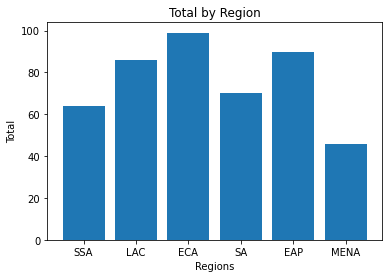

In [158]:
# Create a bar chart
plt.bar(region,total)
# Add labels and title
plt.xlabel('Regions')
plt.ylabel('Total')
plt.title('Total by Region')

# Show the chart
plt.show()

In [159]:
#plotting total percentage of children  that have internet connection at home with respect to the income group they belong to

In [160]:
plt.scatter(primary_loaded['Income Group'], primary_loaded['Total'])
plt.title('Numerical Data')
plt.xlabel('INCOME GROUP')
plt.ylabel('TOTAL')

Text(0, 0.5, 'TOTAL')

Task 2 
2

. Explore the data about all children in a school attendance age (approximately 3-17
years old depending on the country), and analyze the top 10 countries and areas with
the highest total percentage of school-age children (who have internet connection at
home) in terms of their Income Group and Residence (Rural or Urban).

In [161]:
df2=school_loaded[['Countries and areas','Income Group','Total','Rural (Residence)','Urban (Residence)']]
df2

Countries and areas              Income Group  Total  Rural (Residence)  \
0              Algeria  Upper middle income (UM)   24.0           9.000000   
1               Angola  Lower middle income (LM)   17.0           2.000000   
2            Argentina  Upper middle income (UM)   40.0          27.077922   
3              Armenia  Upper middle income (UM)   81.0          71.000000   
4           Bangladesh  Lower middle income (LM)   37.0          33.000000   
..                 ...                       ...    ...                ...   
82             Uruguay           High income (H)   63.0          47.000000   
83          Uzbekistan  Lower middle income (LM)   19.0          16.000000   
84            Viet Nam  Lower middle income (LM)   62.0          27.077922   
85              Zambia  Lower middle income (LM)    6.0           2.000000   
86            Zimbabwe  Lower middle income (LM)   26.0          18.000000   

    Urban (Residence)  
0             32.0000  
1             24.0000  
2             43.9375  
3             88.0000  
4             52.0000  
..                ...  
82            65.0000  
83            29.0000  
84            62.0000  
85            13.0000  
86            49.0000  

[87 rows x 5 columns]

In [162]:
#now sorting the rows according to total high to low

In [163]:
df2.sort_values(by="Total", ascending=False, inplace=True)

<ipython-input-163-153d3207b2f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by="Total", ascending=False, inplace=True)


In [164]:
df2

Countries and areas              Income Group  Total  \
81                    United Kingdom           High income (H)   99.0   
62                            Serbia  Upper middle income (UM)   94.0   
72                   North Macedonia  Upper middle income (UM)   92.0   
74                             Tonga  Upper middle income (UM)   91.0   
58                Russian Federation  Upper middle income (UM)   89.0   
..                               ...                       ...    ...   
40  Lao People's Democratic Republic  Lower middle income (LM)    2.0   
21  Democratic Republic of the Congo            Low income (L)    1.0   
11                      Burkina Faso            Low income (L)    1.0   
79                            Uganda            Low income (L)    0.0   
66                       South Sudan            Low income (L)    0.0   

    Rural (Residence)  Urban (Residence)  
81          27.077922            43.9375  
62          91.000000            97.0000  
72          90.000000            93.0000  
74          90.000000            94.0000  
58          79.000000            94.0000  
..                ...                ...  
40           1.000000             4.0000  
21           0.000000             2.0000  
11           1.000000             4.0000  
79           0.000000             2.0000  
66           0.000000             1.0000  

[87 rows x 5 columns]

In [165]:
#selecting the top 10 countries

In [166]:
top_10_countries = df2.head(10)

In [167]:
top_10_countries

Countries and areas              Income Group  Total  Rural (Residence)  \
81      United Kingdom           High income (H)   99.0          27.077922   
62              Serbia  Upper middle income (UM)   94.0          91.000000   
72     North Macedonia  Upper middle income (UM)   92.0          90.000000   
74               Tonga  Upper middle income (UM)   91.0          90.000000   
58  Russian Federation  Upper middle income (UM)   89.0          79.000000   
15               Chile           High income (H)   86.0          70.000000   
27             Georgia  Upper middle income (UM)   85.0          72.000000   
9               Brazil  Upper middle income (UM)   83.0          51.000000   
48          Montenegro  Upper middle income (UM)   82.0          74.000000   
3              Armenia  Upper middle income (UM)   81.0          71.000000   

    Urban (Residence)  
81            43.9375  
62            97.0000  
72            93.0000  
74            94.0000  
58            94.0000  
15            89.0000  
27            93.0000  
9             89.0000  
48            86.0000  
3             88.0000

3. Please thoroughly compare the percentage of Primary children and Secondary Children that are from a Lower middle income (LM) group with Internet connection at
home.

In [168]:
#subsetting income group and total from primary dataset

In [169]:
pri=primary_loaded[['Income Group','Total']]

In [170]:
pri

Income Group  Total
0   Lower middle income (LM)   15.0
1   Upper middle income (UM)   39.0
2   Upper middle income (UM)   81.0
3   Lower middle income (LM)   34.0
4            High income (H)   63.0
..                       ...    ...
82           High income (H)   63.0
83  Lower middle income (LM)   19.0
84  Lower middle income (LM)   58.0
85  Lower middle income (LM)    6.0
86  Lower middle income (LM)   25.0

[87 rows x 2 columns]

In [171]:
#subsetting income group and total from secondary dataset

In [172]:
sec=secondary_loaded[['Income Group','Total']]

In [173]:
sec

Income Group  Total
0   Lower middle income (LM)   24.0
1   Upper middle income (UM)   45.0
2   Upper middle income (UM)   85.0
3   Lower middle income (LM)   42.0
4            High income (H)   76.0
..                       ...    ...
77           High income (H)   70.0
78  Lower middle income (LM)   22.0
79  Lower middle income (LM)   67.0
80  Lower middle income (LM)    7.0
81  Lower middle income (LM)   29.0

[82 rows x 2 columns]

In [174]:
#select only those students from Lower middle income from primary

In [175]:
filtered_pri = pri[pri['Income Group'] == 'Lower middle income (LM)']

In [176]:
filtered_pri

Income Group  Total
0   Lower middle income (LM)   15.0
3   Lower middle income (LM)   34.0
6   Lower middle income (LM)   11.0
11  Lower middle income (LM)    4.0
18  Lower middle income (LM)    2.0
21  Lower middle income (LM)    4.0
24  Lower middle income (LM)   16.0
27  Lower middle income (LM)   16.0
31  Lower middle income (LM)    7.0
32  Lower middle income (LM)   17.0
37  Lower middle income (LM)   30.0
38  Lower middle income (LM)   50.0
39  Lower middle income (LM)   72.0
40  Lower middle income (LM)    1.0
41  Lower middle income (LM)   30.0
45  Lower middle income (LM)    3.0
47  Lower middle income (LM)   37.0
49  Lower middle income (LM)   16.0
52  Lower middle income (LM)    4.0
54  Lower middle income (LM)    3.0
55  Lower middle income (LM)    8.0
60  Lower middle income (LM)   44.0
61  Lower middle income (LM)    5.0
68  Lower middle income (LM)    3.0
76  Lower middle income (LM)   36.0
80  Lower middle income (LM)   73.0
83  Lower middle income (LM)   19.0
84  Lower middle income (LM)   58.0
85  Lower middle income (LM)    6.0
86  Lower middle income (LM)   25.0

In [177]:
#select only those students from Lower middle income from primary

In [178]:
filtered_sec = sec[sec['Income Group'] == 'Lower middle income (LM)']

In [179]:
filtered_sec

Income Group      Total
0   Lower middle income (LM)  24.000000
3   Lower middle income (LM)  42.000000
10  Lower middle income (LM)   7.000000
17  Lower middle income (LM)   3.000000
20  Lower middle income (LM)   9.000000
24  Lower middle income (LM)  20.000000
28  Lower middle income (LM)  12.000000
29  Lower middle income (LM)  23.000000
34  Lower middle income (LM)  39.000000
35  Lower middle income (LM)  59.000000
36  Lower middle income (LM)  77.000000
37  Lower middle income (LM)   2.000000
38  Lower middle income (LM)  38.000000
42  Lower middle income (LM)   4.000000
43  Lower middle income (LM)  38.000000
45  Lower middle income (LM)  19.000000
48  Lower middle income (LM)   4.000000
50  Lower middle income (LM)   4.000000
51  Lower middle income (LM)  10.000000
55  Lower middle income (LM)  46.000000
56  Lower middle income (LM)   7.000000
63  Lower middle income (LM)   5.000000
71  Lower middle income (LM)  45.000000
75  Lower middle income (LM)  41.512195
78  Lower middle income (LM)  22.000000
79  Lower middle income (LM)  67.000000
80  Lower middle income (LM)   7.000000
81  Lower middle income (LM)  29.000000

In [180]:
pri_sum = filtered_pri['Total'].sum()

In [181]:
sec_sum = filtered_sec['Total'].sum()

In [182]:
pri_sum


649.0

In [183]:
sec_sum

703.5121951219512

In [184]:
primary_percentage = (pri_sum / (pri_sum + sec_sum)) * 100
secondary_percentage = (sec_sum / (pri_sum + sec_sum)) * 100

In [185]:
# Create a pie chart
labels = ['Primary', 'Secondary']
sizes = [primary_percentage, secondary_percentage]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Children in Primary and Secondary school from Lower middle Income Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [186]:
#therefore we know that there are more childen in secondary school from lower middle income with internet connection than primary school children.